In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = "C:/Users/osanc/Desktop/IronHack/Sem_5/amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(path)

In [4]:
df.head(3)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?



---

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

In [6]:
df_topcategory = df.category.value_counts().sort_values(ascending=False).head()
df_topcategory = pd.DataFrame(df_topcategory)
df_topcategory

,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978


2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

C:\Users\osanc\AppData\Local\Temp\ipykernel_7360\453054895.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_topcategory, x= "category" , y= "count", palette= "Set3")


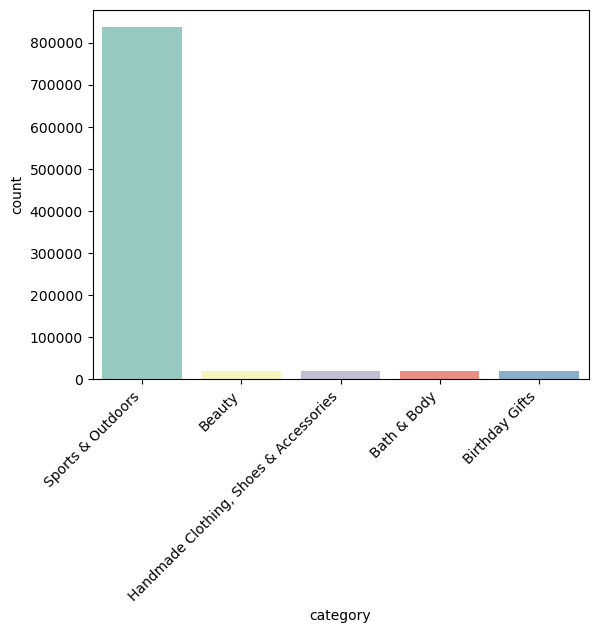

In [7]:
sns.barplot(data = df_topcategory, x= "category" , y= "count", palette= "Set3")
plt.xticks(rotation=45, ha='right')
plt.show()

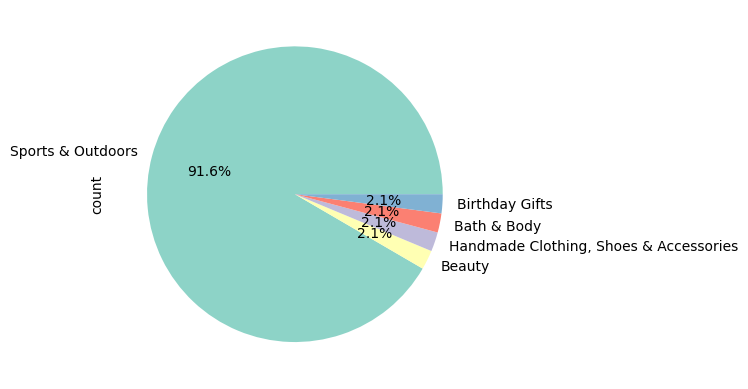

In [8]:
df_topcategory['count'].plot.pie(autopct='%1.1f%%',colors=sns.color_palette("Set3"))

# Asegurarse de que el gráfico tiene proporciones adecuadas
plt.gca().set_aspect('equal')

# Mostrar el gráfico
plt.show()

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?



1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [9]:
mean_price = df["price"].mean()
median_price = df["price"].median()
mode_price = df["price"].mode()

mean_price, median_price, mode_price

(89.24380943923663,
 19.09,
 0    9.99
 Name: price, dtype: float64)

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [10]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price

variance_price, std_dev_price, min_price, max_price, range_price

(119445.48532256528, 345.60886175352226, 0.0, 100000.0, 100000.0)

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

In [11]:
df.shape

(2443651, 9)

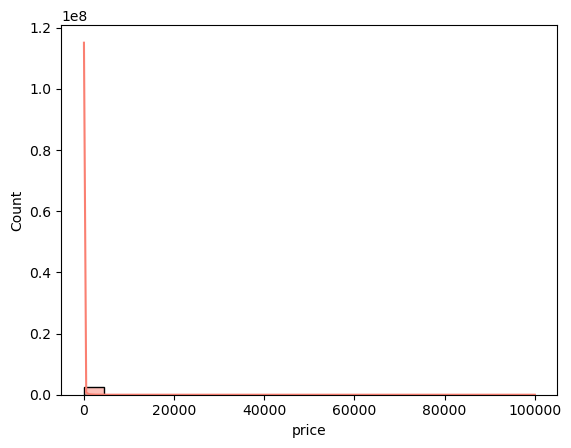

In [13]:
sns.histplot(df['price'], kde=True, bins=23, color="salmon")
plt.show()

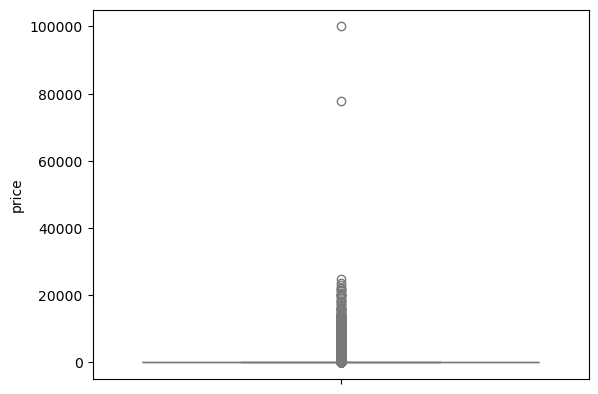

In [14]:
sns.boxplot(data = df['price'], color="lightblue")
plt.show()

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

--

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

In [17]:
mean_stars = df["stars"].mean()
median_stars = df["stars"].median()
mode_stars = df["stars"].mode()

mean_stars, median_stars, mode_stars

(2.152836472966065,
 0.0,
 0    0.0
 Name: stars, dtype: float64)

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

In [18]:
variance_stars = df['stars'].var()
std_dev_stars = df['stars'].std()
min_stars = df['stars'].min()
max_stars = df['stars'].max()
range_stars = max_price - min_price

variance_stars, std_dev_stars, min_stars, max_stars, range_stars

(4.81743402976196, 2.1948653785054697, 0.0, 5.0, 100000.0)

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

In [20]:
skew_stars = df["stars"].skew()  #simetrica cerca  acero
kurtosis_stars = df["stars"].kurtosis() #datos dispersos

skew_stars, kurtosis_stars


(0.08120735761080985, -1.9260061280432985)

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

<Axes: xlabel='stars', ylabel='Count'>

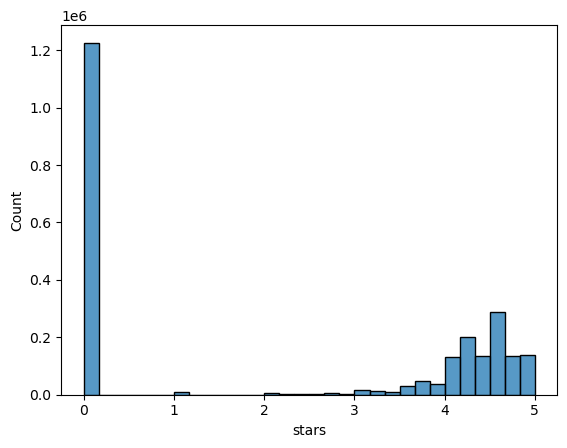

In [21]:
sns.histplot(data=df , x="stars",bins=30)